# k-NN model to classify the CIFAR10 data set

In this first tutorial, we will get started with image classification. We will work with a classical (but difficult) data set named CIFAR10. it is composed of 60000 images with 10 classes. The goal is to train a classifier which is able to assign the correct class when presented with an image it did not see before.

For this first tutorial, we will program k-NN classification and compare our results with the `sklearn` library. The goal is to get familiar with manipulating image data and image classification. In the next tutorials we will tackle more competitive methods.

**NB:** To work through this notebook, you will have to exectue cells (Shift + Return) after **filling in the code where `...` are located**. These are the places you need to work on. Read all the comments above the cells, they are useful!

## Prepare and get a sense of the data

We start by loading our image data set: CIFAR10. Do this by using the metho `cifar10.load_data`. This will directly give you the data in form of `numpy` arrays and partitioned into train and test data.

Observe the shape of the data points: they are in 8 bits RGB image form $32\times 32 \times3$. In this case the number of features is $d=3072$.

In [2]:
from tensorflow.keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('shape of train data is {}, type is {}'.format(x_train.shape, x_train.dtype))
print('shape of test data is {}, type is {}'.format(x_test.shape, x_test.dtype))

170500096/170498071 [==============================] - 3s 0us/step
shape of train data is (50000, 32, 32, 3), type is uint8
shape of test data is (10000, 32, 32, 3), type is uint8


In [3]:
y_train[0]

array([6], dtype=uint8)

Plot an image using `matplotlib`. The function `imshow` automatically interpret the third dimension of the image as the RGB channels.

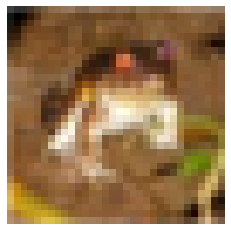

In [4]:
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

plt.imshow(x_train[0])
plt.axis('off')
plt.show()

Plot the first 100 image in a 10 x 10 grid to get a sense of the data

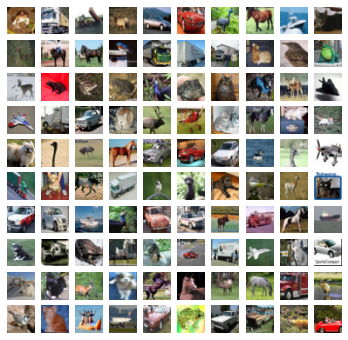

In [5]:
plt.figure(figsize=(6, 6))
for index in range(100):
    axi = plt.subplot(10, 10, index + 1)
    axi.imshow(x_train[index])
    axi.axis('off')
plt.show()

The `y_train` vector corresponds to one of the 10 class ids. observe the class ids using the `np.unique` function of `numpy`.

In [6]:
import numpy as np

# print all class ids
print(np.unique(y_train))

# print the class (ground truth) of the first 5 images
print(y_train[:5])

[0 1 2 3 4 5 6 7 8 9]
[[6]
 [9]
 [9]
 [4]
 [1]]


`np.where` can help locating images of a given class. Find the first 10 images with class 1 (car) in the train set.

In [7]:
np.where(y_train == 1)[0][:10]

array([ 4,  5, 32, 44, 45, 46, 60, 61, 64, 65])

Define a list representing the image categories: 

In [8]:
labels = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'boat', 'truck']

Now we know how to manipulate our data, let's display the first 10 images of each class in the training set. For this we will use the same sort of code as before for plotting images on a grid, but we have to search the right indices of the images so they belong to the right class.

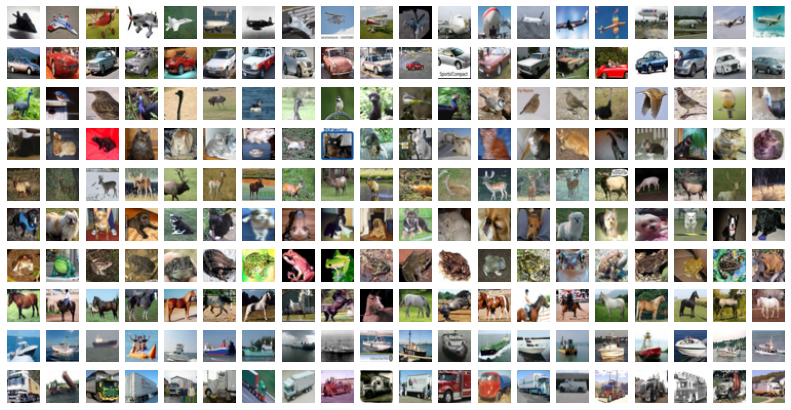

In [9]:
n = 20
plt.figure(figsize=(n*0.6, 6))
for j in range(10):
    index_class_j = np.where(y_train == j)[0][:n]
    for i in range(n):
        axi = plt.subplot(10, n, n * j + (1 + i))
        axi.imshow(x_train[index_class_j[i]])
        axi.axis('off')
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.04, top=0.96)
plt.show()

## Model definition: distance between data points

k-Nearest-Neighbors (k-NN): the simplest machine learning algorithm (does not actually learn anything): classifies unknown data points by finding the  most common class among the $k$ closest examples ($k$ is odd).

The distance between data points need to be defined. Classical examples:

 - Manhattan distance $\sum_{i=1}^d|A_i - B_i|$
 - Euclidean distance $\sqrt{\sum_{i=1}^d(A_i - B_i)^2}$


Start by computing both Euclidean and Manhattan distances between the first two images. Be careful to set the data type to signed integer (use `int16`)

In [10]:
A = x_train[0].astype(np.int16)
B = x_train[1].astype(np.int16)
print('data type should be int16, got: %s' % A.dtype)

d1 = np.sum(np.abs(A - B))
print('Manhattan distance: {}'.format(d1))

d2 = np.sqrt(np.sum((A - B) ** 2))
print('Euclidean distance: {}'.format(d2))

data type should be int16, got: int16
Manhattan distance: 197173
Euclidean distance: 3837.1052891470154


Now prepare for training the NN-model.

First we reshape the data into large column vectors `X_train` and `X_test`. Use the function `np.reshape` for this. Note that both vectors must be of type signed integers (eg `np.int16`) to avoid problems with uint8 when computing L1 distance.

In [11]:
X_train = x_train.reshape((x_train.shape[0], 3072)).astype(np.int16)
X_test = x_test.reshape((x_test.shape[0], -1)).astype(np.int16)

print('shape of train data is {}, type is {}'.format(X_train.shape, X_train.dtype))
print('shape of test data is {}, type is {}'.format(X_test.shape, X_test.dtype))

shape of train data is (50000, 3072), type is int16
shape of test data is (10000, 3072), type is int16


In [12]:
X_train[0]

array([ 59,  62,  63, ..., 123,  92,  72], dtype=int16)

## Run the model with k=1

Use L1 (Manhattan) distance to compare images and perform nearest neighbor prediction on a **random image of the test set**. Note that in the case of k-NN we can use image in the test set since the model is not actually learning any parameters.

Compute the L1 distance of a random image with the **first 10 images of the training set**.

In [13]:
index = np.random.randint(X_test.shape[0])
print('using image {}'.format(index))

image = X_test[index]
print(image.shape)

for i in range(10):
    d1 = np.sum(np.abs(image - X_train[i, :]))
    print(d1)

print(X_train[:10, :].shape)
d1 = np.sum(np.abs(image - X_train[:10, :]), axis=1)
print(d1)

using image 6485
(3072,)
219532
224261
240209
217215
199127
230265
204343
237074
233243
251920
(10, 3072)
[219532 224261 240209 217215 199127 230265 204343 237074 233243 251920]


Here we pick a category $c=5$ (dog). Get the first dog image in the test set and compute all $d_1$ distances (with all images in the training set). The index of the minimum distance can be obtain with function `argmin`. Then **make a prediction** for this image.

In [14]:
c = 5
# pick the first test image with category c
index_for_c = np.where(y_test == c)[0][0]
print('index of %s image being tested: %d' % (labels[c], index_for_c))
print(y_test[index_for_c])  # should be equal to [c]
image = X_test[index_for_c].astype(np.int16)

# compute all d1 distances
all_d1 = np.sum(np.abs(image - X_train[:, :]), axis=1)
min_index = np.argmin(all_d1)
print('min distance is %.1f' % all_d1[min_index])
print('min_index = %d' % min_index)
sorted_indices = np.argsort(all_d1)[:10]
#print(sorted_indices)
#print(all_d1[sorted_indices])
category = np.squeeze(y_train[min_index])

print('predicted class is %d' % category)
print('actual class is %d' % c)

index of dog image being tested: 12
[5]
min distance is 107143.0
min_index = 8398
predicted class is 5
actual class is 5


Plot the test image and the nearest neighbor image in the training set.

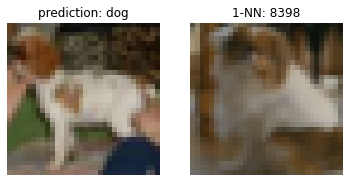

In [15]:
ax = plt.subplot(1, 2, 1)
plt.imshow(x_test[index_for_c])
plt.axis('off')
plt.title('prediction: %s' % labels[category])
# now display the first NN
ax = plt.subplot(1, 2, 2)
plt.imshow(x_train[min_index])
plt.axis('off')
plt.title('1-NN: %s' % min_index)
plt.show()

Create a vertical representation of the 10 image classes using the first one of each class in the test set.

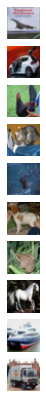

In [16]:
n = 10
plt.figure(figsize=(1, 5.8))
for c in range(n):
    index_for_c = np.where(y_test == c)[0][0]
    axi = plt.subplot(n, 1, c + 1)
    axi.imshow(x_test[index_for_c])
    axi.axis('off')
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.04, top=0.96)
plt.show()

Display the first 10 nearest neighbors of each test image

[47188 20447 43234 20051 31377  8309 35193 43686 49870   420]
[ 7535 45104 42768 44019 34140 48071 41470 48602 29959 49400]
[37153  4469 49258 21298 27241 14826 37674 26038  3904 40650]
[37867 23171 25566 42399 46343 19503 31635 33158 38384 47871]
[ 1881 23549  6694 46398 27492 17967  3949 12166 24966 47079]
[16603 31564 47846 14894 15160 14772 29097  2654 35708   347]
[38805 28943 19117 21293 21412 31232 26190 25341 30594 37835]
[  910  7811 30391  9900 16254 30857 14747  7576  1838 49683]
[12826 24810 48306 20149 17684 31707  9008 42483 46728 13650]
[12544 40470 15291 34369 25374 22214 22935 48709 36659  2096]


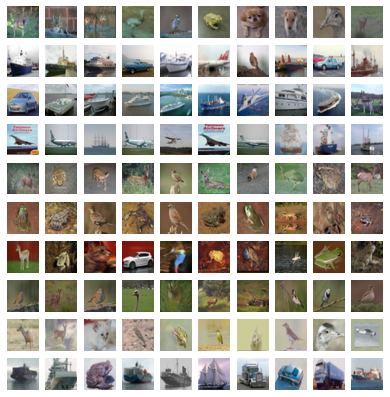

In [17]:
n = 10
plt.figure(figsize=(5.8, 5.8))
for k in range(n):
    index_for_k = k
    image = x_test[index_for_k].astype(np.int16)
    all_d1 = np.sum(np.abs(image.ravel() - X_train[:, :]), axis=1)
    sorted_indices = np.argsort(all_d1)[:10]
    print(sorted_indices)
    for i in range(n):
        axi = plt.subplot(n, n, n * k + (1 + i))
        axi.imshow(x_train[sorted_indices[i]])
        axi.axis('off')
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.04, top=0.96)
plt.show()

Create a visual representation of the pattern by averaging the first 10 NN

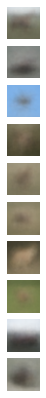

In [18]:
n = 10
plt.figure(figsize=(1, 5.8))
for c in range(n):
    index_for_c = np.where(y_test == c)[0][3]
    image = x_test[index_for_c].astype(np.int16)
    all_d1 = np.sum(np.abs(image.ravel() - X_train[:, :]), axis=1)
    sorted_indices = np.argsort(all_d1)[:100]
    # average the NN
    pattern = np.mean(x_train[sorted_indices], axis=0).astype(np.uint8)
    axi = plt.subplot(n, 1, c + 1)
    axi.imshow(pattern)
    axi.axis('off')
plt.subplots_adjust(left=0.05, right=0.95, bottom=0.04, top=0.96)
plt.show()

## Use sklearn to perform 1-NN classification

In [19]:
print('data size in memory: {:.1f} Mb'.format(X_train.nbytes / (1024 **2 )))

data size in memory: 293.0 Mb


In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

Create the model using the `KNeighborsClassifier` class with 1 neighbor and Manhattan distance (p=1).

In [21]:
model = KNeighborsClassifier(n_neighbors=1, p=1, algorithm='brute')

In [22]:
y_train.shape

(50000, 1)

In [23]:
model.fit(X_train, np.squeeze(y_train))

KNeighborsClassifier(algorithm='brute', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=1,
                     weights='uniform')

Make a prediction for the first dog image in the test set.

In [24]:
image = np.reshape(X_test[12], (1, 3072))
model.predict(image)

array([5], dtype=uint8)

Get the 3 closest distances for this image.

In [25]:
distances_sklearn, indices_sklearn = model.kneighbors(image, 3)
print(distances_sklearn)
print(indices_sklearn)

[[107143. 107923. 108278.]]
[[8398 3540 4124]]


## Comparison of our 1-NN with results from sklearn model

Here we plot side by side our predictions with those obtained with the `sklearn` model.

[  993  2567 16512]
[115500 115544 116846]


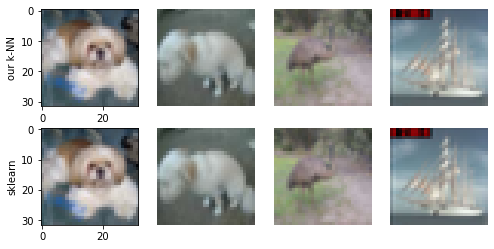

In [26]:
index = 39
image = x_test[index].astype(np.int16)
all_d1 = np.sum(np.abs(image.ravel() - X_train[:, :]), axis=1)
sorted_indices = np.argsort(all_d1)[:3]

print(sorted_indices)
print(all_d1[sorted_indices])

plt.figure(figsize=(8, 4)) 
ax = plt.subplot(2, 4, 1)
ax.imshow(image)
#ax.axis('off')
plt.ylabel('our k-NN')
ax = plt.subplot(2, 4, 5)
ax.imshow(image)
#ax.axis('off')
plt.ylabel('sklearn')
for i in range(3):
    axi = plt.subplot(2, 4, (2 + i))
    axi.imshow(x_train[sorted_indices][i])
    axi.axis('off')
# compare with sklearn
indices_sklearn = [993, 2567, 16512]
distances_sklearn = [115500., 115544., 116846.]
for i in range(3):
    axi = plt.subplot(2, 4, 4 + (2 + i))
    axi.imshow(x_train[indices_sklearn][i])
    axi.axis('off')
plt.show()

## Try to change the hyper-parameters

The $k$ value and and distance metric are 2 important hyper-parameters that we can change to improve our model. Try using 3 neighbors and L2 distance (p=2).

In [27]:
model_kNN = KNeighborsClassifier(n_neighbors=3, p=2)
model_kNN.fit(X_train, np.squeeze(y_train))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

[0]


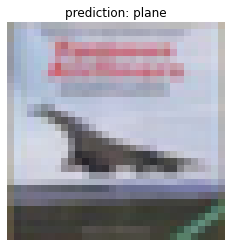

In [30]:
# test the model on a few images
k = 0
# pick the first test image with category k
index_for_k = np.where(y_test == k)[0][0]
print(y_test[index_for_k])
image = x_test[index_for_k]
category = model_kNN.predict(image.ravel().reshape((1, 3072)))[0]

plt.imshow(image)
plt.axis('off')
plt.title('prediction: %s' % labels[category])
plt.show()

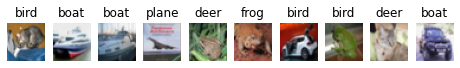

In [31]:
n = 10
predictions = model_kNN.predict(X_test[:n].reshape((n, 3072)))
plt.figure(figsize=(8, 1.5)) 
for i in range(n):
    axi = plt.subplot(1, n, (1 + i))
    axi.imshow(x_test[i])
    axi.axis('off')
    plt.title(labels[predictions[i]])
plt.show()

Warning, running the next cell takes a very long time since predictions with kNN are slow for large training sets. This is a good example of the limitation of this model.

In [ ]:
print(classification_report(y_test, model_kNN.predict(X_test), target_names=labels))

Finally create an visual representation with 10 rows corresponding to 10 test images. Each row display the test image on the left and its the 10-NN images in the train set as computed by the model.

In [ ]:
m = 10
offset = 30
plt.figure(figsize=(5.8, 5.8)) 
for k in range(n):
    # show the test image in the first column
    ax = plt.subplot(n, 1 + m, (m + 1) * k + 1)
    ax.imshow(x_test[offset + k])
    ax.axis('off')
    distances, indices = model_kNN.kneighbors(X_test[offset + k:offset + k + 1], m)
    for i in range(m):
        axi = plt.subplot(n, 1 + m, (m + 1) * k + (2 + i))
        axi.imshow(x_train[indices[0][i]])
        axi.axis('off')
plt.show()

One can observe the visual proximity of the image in each row. However the images are not all from the same class. We can perhaps improve the predictions by increasing $k$ but the model is simply not well adapted to so different images.